<a href="https://colab.research.google.com/github/soumithrao123/Data-Visualization-Class-Work/blob/main/DTSC_5502_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# --- Load and Inspect the Dataset ---
# This example uses the Telco Customer Churn dataset.
# You can download it from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
# For simplicity, we'll create a sample DataFrame. In a real scenario, you'd load your CSV.
data = {
    'gender': ['Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'SeniorCitizen': [0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
    'Partner': ['Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Dependents': ['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes'],
    'tenure': [1, 34, 2, 45, 2, 8, 22, 10, 28, 62],
    'PhoneService': ['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
    'MultipleLines': ['No phone service', 'No', 'No', 'No phone service', 'Yes', 'Yes', 'Yes', 'No phone service', 'Yes', 'No'],
    'InternetService': ['DSL', 'DSL', 'DSL', 'DSL', 'Fiber optic', 'Fiber optic', 'Fiber optic', 'DSL', 'Fiber optic', 'DSL'],
    'OnlineSecurity': ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes'],
    'TotalCharges': [29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5, 1629.85, 30.2, 1495.6, 3865.2],
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Convert TotalCharges to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill missing values that might result from coercion
df.dropna(inplace=True)

print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Head:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3  Female              0      No        Yes      45           No   
4  Female              1     Yes         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  TotalCharges Churn  
0  No phone service             DSL             No         29.85    No  
1                No             DSL            Yes       1889.50    No  
2                No             DSL            Yes        108.15   Yes  
3  No phone service             DSL            Yes       1840.75    No  
4               Yes     Fiber optic             No        151.65   Yes  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column           

In [3]:
# --- Define Features and Target ---
# Define the target variable and features
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identify categorical and numerical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['SeniorCitizen', 'tenure', 'TotalCharges']
Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']


In [4]:
# --- Create Preprocessing Pipelines ---
# Create a pipeline for numerical features (scaling)
numerical_transformer = StandardScaler()

# Create a pipeline for categorical features (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

In [5]:
# --- Split the Data ---
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (8, 10)
Testing set shape: (2, 10)


In [6]:
# --- Create the Full Machine Learning Pipeline ---
# Define the model we want to use
# We'll use RandomForestClassifier for this example
model = RandomForestClassifier(random_state=42)

# Create the full pipeline by combining the preprocessor and the model
ml_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [7]:
# --- Train the Model ---
# Train the pipeline on the training data
ml_pipeline.fit(X_train, y_train)
print("\nModel training complete.")


Model training complete.



--- Initial Model Evaluation ---
Accuracy: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



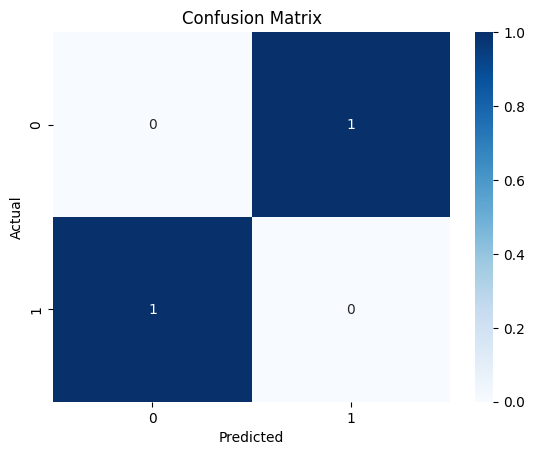

In [8]:
# --- Evaluate the Model on the Test Set ---
# Make predictions on the test set
y_pred = ml_pipeline.predict(X_test)

# Evaluate the model's performance
print("\n--- Initial Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# --- Hyperparameter Tuning with GridSearchCV ---
# Define the parameter grid to search
# We'll tune parameters for the RandomForestClassifier step of our pipeline
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': ['balanced', None]
}

# Create the GridSearchCV object
# cv=3 means 3-fold cross-validation
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(ml_pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
print("\n--- Starting Hyperparameter Tuning ---")
grid_search.fit(X_train, y_train)


--- Starting Hyperparameter Tuning ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced', None],
                         'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)


Best parameters found:
{'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 200}

--- Tuned Model Evaluation ---
Tuned Model Accuracy: 0.0000

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



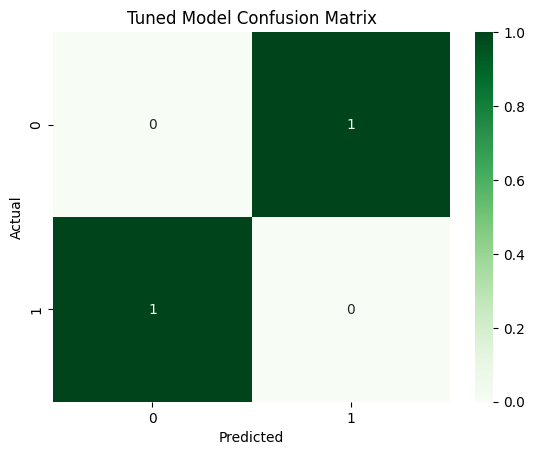

In [10]:
# --- Evaluate the Best Model ---
# Print the best parameters found
print("\nBest parameters found:")
print(grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance
print("\n--- Tuned Model Evaluation ---")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_best))

# Display the new confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title('Tuned Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

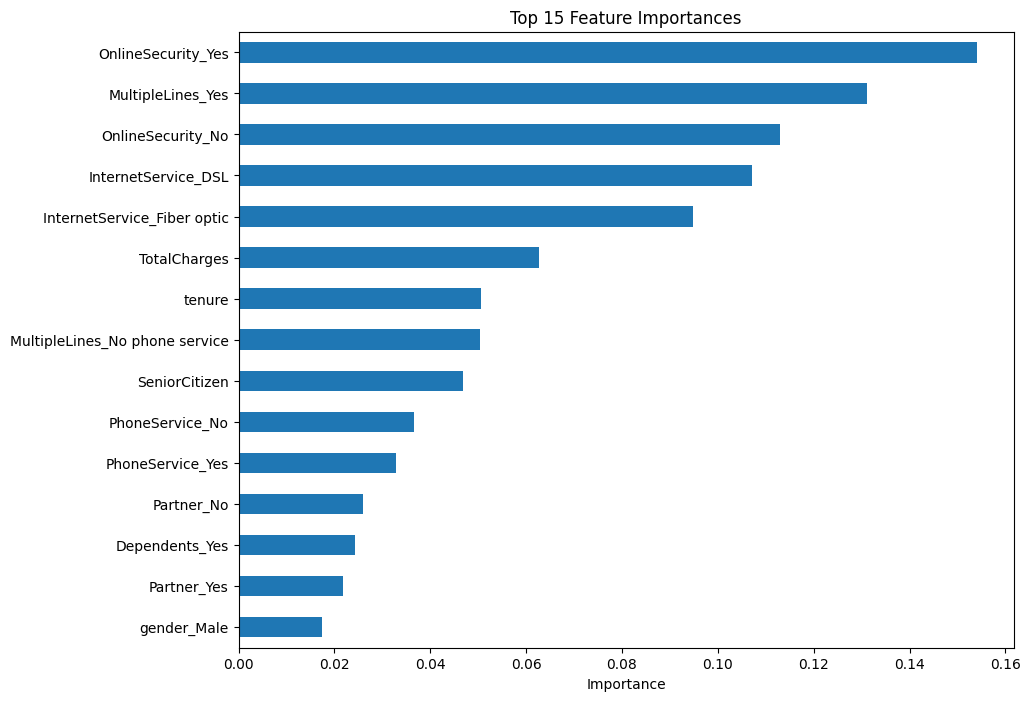

In [11]:
# --- Feature Importance from the Tuned Model ---
# Extract the best classifier and the preprocessor from the pipeline
best_classifier = best_model.named_steps['classifier']
preprocessor_fitted = best_model.named_steps['preprocessor']

# Get feature names after one-hot encoding
cat_feature_names = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_feature_names])

# Create a series with feature importances
importances = pd.Series(best_classifier.feature_importances_, index=all_feature_names)

# Sort and plot the top 15 feature importances
plt.figure(figsize=(10, 8))
importances.nlargest(15).sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.show()